#### Обработка данных

In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data/experiment.csv') # Считываем данные

In [3]:
data.head(5)

,I,F1,F2,Cu_1,Cu_2,Cu_3,Al_1,Al_2,Al_3
0,0.0,0.0,0.0,0.9198,0.9200,0.9202,0.8127,0.8140,0.8125
1,0.2,1.3,1.4,0.9195,0.9195,0.9194,0.8166,0.8177,0.8157
2,0.3,2.1,2.2,0.9188,0.9187,0.9186,0.8222,0.8221,0.8207
3,0.4,2.9,2.9,0.9183,0.9176,0.9175,0.8267,0.8279,0.8268
4,0.5,3.6,3.7,0.9155,0.9158,0.9154,0.8335,0.8342,0.8351


In [4]:
data.insert(9, 'B1', data['F1']*(0.001)/(72*0.0001))
data.insert(10, 'B2', data['F2']*(0.001)/(72*0.0001))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set_style("whitegrid")

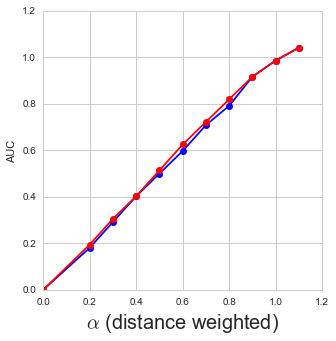

In [6]:
plt.figure(1, figsize=(5,5))
plt.plot(data['I'], data['B1'], marker='o', color='b')
plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
plt.show()

In [7]:
data.insert(11, 'mean_Cu', ((data['Cu_1'] + data['Cu_2'] + data['Cu_2'])/3 + 85.0))
data['Cu_1'] = (data['Cu_1'] + 85.0)
data['Cu_2'] = (data['Cu_2'] + 85.0)
data['Cu_3'] = (data['Cu_3'] + 85.0)

In [8]:
data

,I,F1,F2,Cu_1,Cu_2,Cu_3,Al_1,Al_2,Al_3,B1,B2,mean_Cu
0,0.0,0.0,0.0,85.9198,85.9200,85.9202,0.8127,0.8140,0.8125,0.000000,0.000000,85.919933
1,0.2,1.3,1.4,85.9195,85.9195,85.9194,0.8166,0.8177,0.8157,0.180556,0.194444,85.919500
2,0.3,2.1,2.2,85.9188,85.9187,85.9186,0.8222,0.8221,0.8207,0.291667,0.305556,85.918733
3,0.4,2.9,2.9,85.9183,85.9176,85.9175,0.8267,0.8279,0.8268,0.402778,0.402778,85.917833
4,0.5,3.6,3.7,85.9155,85.9158,85.9154,0.8335,0.8342,0.8351,0.500000,0.513889,85.915700
5,0.6,4.3,4.5,85.9120,85.9116,85.9112,0.8425,0.8426,0.8424,0.597222,0.625000,85.911733
6,0.7,5.1,5.2,85.9098,85.9102,85.9103,0.8521,0.8518,0.8516,0.708333,0.722222,85.910067
7,0.8,5.7,5.9,85.9075,85.9060,85.9060,0.8607,0.8608,0.8618,0.791667,0.819444,85.906500
8,0.9,6.6,6.6,85.9013,85.9009,85.9017,0.8690,0.8699,0.8695,0.916667,0.916667,85.901033
9,1.0,7.1,7.1,85.8997,85.8998,85.8989,0.8797,0.8799,0.8806,0.986111,0.986111,85.899767


In [9]:
data.insert(12, 'sqr_Cu', np.sqrt(0.5*((data['Cu_1'] - data['mean_Cu'])**2 + (data['Cu_2'] - data['mean_Cu'])**2 + (data['Cu_3'] - data['mean_Cu'])**2)))

In [10]:
data.insert(13, 'mean_Al', ((data['Al_1'] + data['Al_2'] + data['Al_2'])/3 + 27.0))
data['Al_1'] = (data['Al_1'] + 27.0)
data['Al_2'] = (data['Al_2'] + 27.0)
data['Al_3'] = (data['Al_3'] + 27.0)

In [11]:
data.insert(14, 'sqr_Al', np.sqrt(0.5*((data['Al_1'] - data['mean_Al'])**2 + (data['Al_2'] - data['mean_Al'])**2 + (data['Al_3'] - data['mean_Al'])**2)))

In [12]:
data.insert(15, 'mean_B', 0.5*(data['B1'] + data['B2']))
data.insert(16, 'square_B', data['mean_B']**2)

In [13]:
data.insert(17, 'square_B_err', 2*0.1*0.001/(72*0.0001))
data['square_B_err'][0] = 0.0
data.insert(18, 'err_I', 0.01)
data.insert(19, 'err_F', 0.1)

In [14]:
data['mean_Cu'] = data['mean_Cu'] - data['mean_Cu'].max()
data['mean_Al'] = data['mean_Al'] - data['mean_Al'].min()

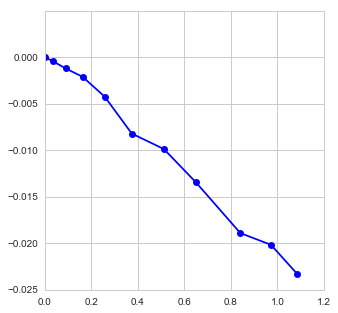

In [15]:
plt.figure(1, figsize=(5,5))
plt.plot(data['mean_B']**2, data['mean_Cu'], marker='o', color='b')
plt.show()

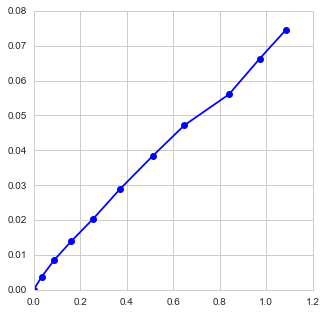

In [16]:
plt.figure(1, figsize=(5,5))
plt.plot(data['mean_B']**2, data['mean_Al'], marker='o', color='b')
plt.show()

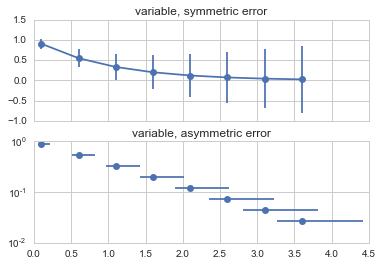

In [17]:
# Example

import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
# example error bar values that vary with x-position
error = 0.1 + 0.2 * x
# error bar values w/ different -/+ errors
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)

ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')

plt.show()

<Container object of 3 artists>

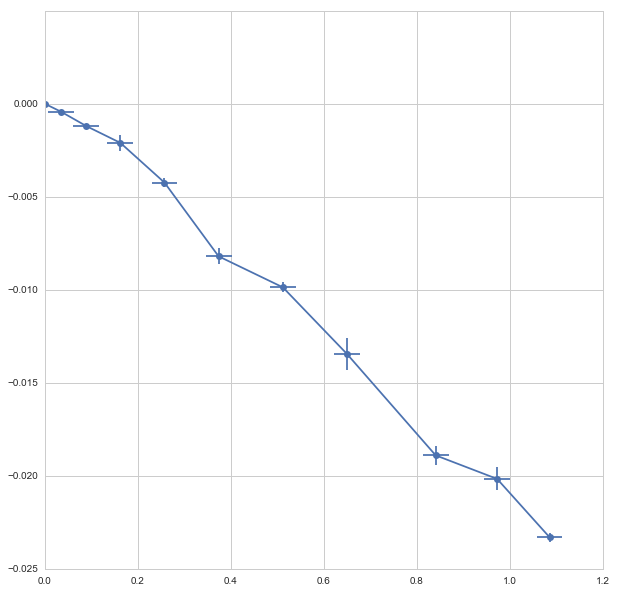

In [18]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10, 10))
ax.errorbar(data['square_B'], data['mean_Cu'], yerr=data['sqr_Cu'], xerr=data['square_B_err'], fmt='-o')

<Container object of 3 artists>

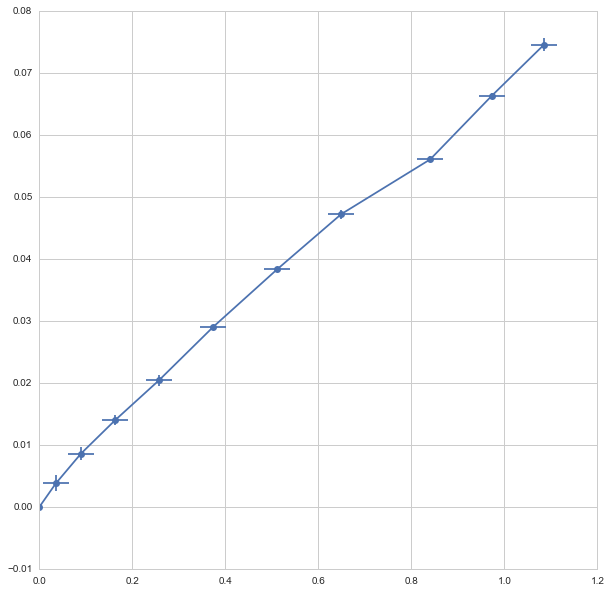

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10, 10))
ax.errorbar(data['square_B'], data['mean_Al'], yerr=data['sqr_Al'], xerr=data['square_B_err'], fmt='-o')

In [20]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data['square_B'], data['mean_Al'], method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (0.0024684) + (0.0665047)*x
(+-)(0.0007658) + (+-)(0.0013111)*x


In [21]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data['square_B'], data['mean_Cu'], method='trf') #, sigma = data['sqr_Cu'], absolute_sigma=True)

print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (0.0007039) + (-0.0220241)*x
(+-)(0.0003267) + (+-)(0.0005593)*x


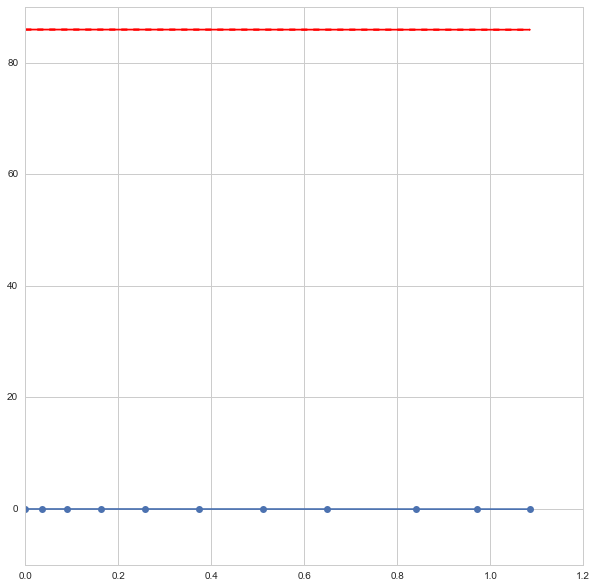

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10, 10))
ax.errorbar(data['mean_B']**2, data['mean_Cu'], yerr=data['sqr_Cu'], fmt='-o')
ax.plot([(data['mean_B']**2).min(), (data['mean_B']**2).max()], [85.9206373 -0.0220241 * data['mean_B'].min(), 85.9206373 -0.0220241 * data['mean_B'].max()], 'r')
ax.plot([(data['mean_B']**2).min(), (data['mean_B']**2).max()], [(85.9206373 + 2*0.0003267) -(0.0220241-2*0.0005593) * data['mean_B'].min(), (85.9206373 + 2*0.0003267) -(0.0220241-2*0.0005593)  * data['mean_B'].max()], '--r')
ax.plot([(data['mean_B']**2).min(), (data['mean_B']**2).max()], [(85.9206373 - 2*0.0003267) -(0.0220241+2*0.0005593) * data['mean_B'].min(), (85.9206373 - 2*0.0003267) -(0.0220241+2*0.0005593) * data['mean_B'].max()], '--r')

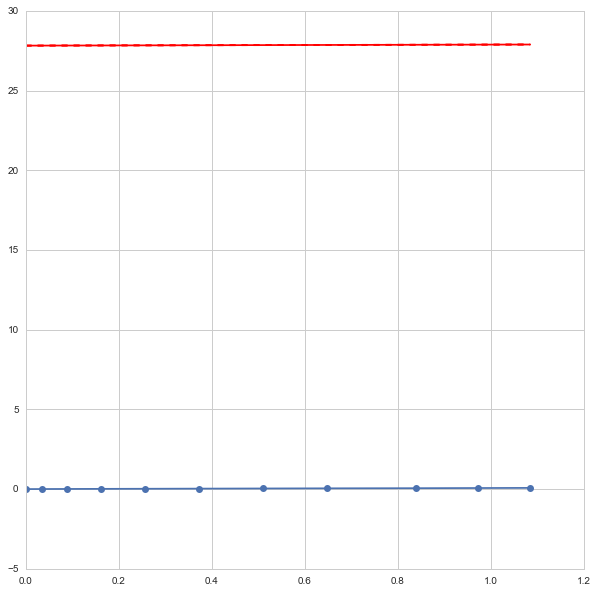

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10, 10))
ax.errorbar(data['mean_B']**2, data['mean_Al'], yerr=data['sqr_Al'], fmt='-o')
ax.plot([(data['mean_B']**2).min(), (data['mean_B']**2).max()], [27.8160350 +0.0665047 * data['mean_B'].min(), 27.8160350 +0.0665047 * data['mean_B'].max()], 'r')
ax.plot([(data['mean_B']**2).min(), (data['mean_B']**2).max()], [(27.8160350 + 2*0.0007658) +(0.0665047+2*0.0013111) * data['mean_B'].min(), (27.8160350 + 2*0.0007658) +(0.0665047+2*0.0013111) * data['mean_B'].max()], '--r')
ax.plot([(data['mean_B']**2).min(), (data['mean_B']**2).max()], [(27.8160350 - 2*0.0007658) +(0.0665047-2*0.0013111) * data['mean_B'].min(), (27.8160350 - 2*0.0007658) +(0.0665047-2*0.0013111) * data['mean_B'].max()], '--r')

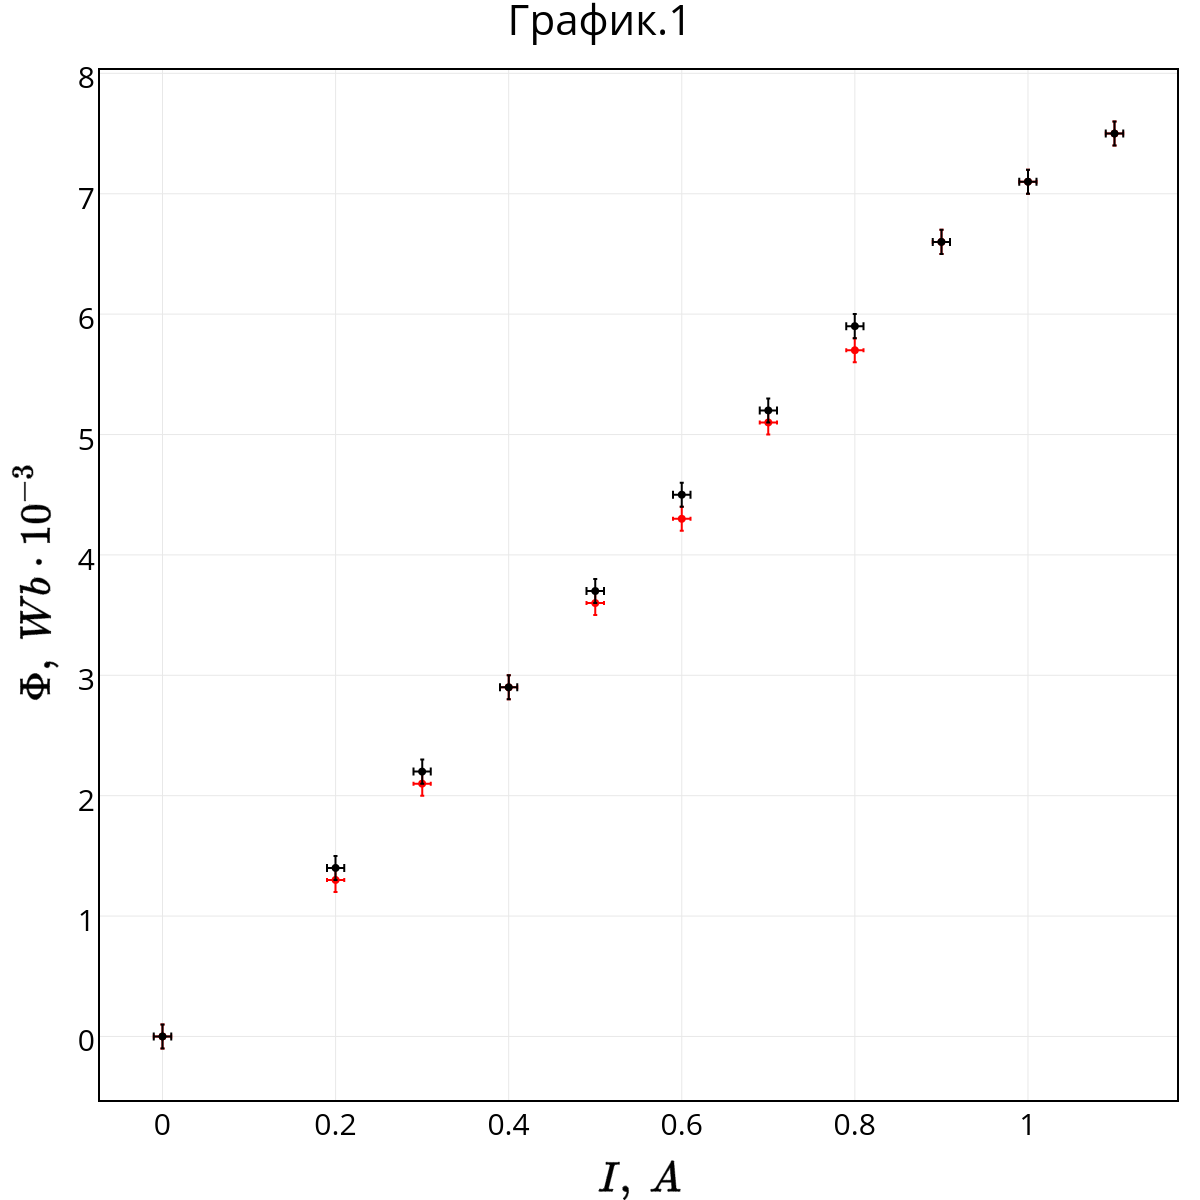

In [28]:
trace1 = go.Scatter(
    x = data['I'],
    y = data['F1'],
    mode = 'markers',
    name = 'gr1',
    error_y = dict(
        type = 'data',
        array=data['err_F'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array=data['err_I'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 8,
        opacity = 1,
        color = '#ff0000'
    )
)

trace2 = go.Scatter(
    x = data['I'],
    y = data['F2'],
    mode = 'markers',
    name = 'gr1',
    error_y = dict(
        type = 'data',
        array=data['err_F'],
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array=data['err_I'],
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 8,
        opacity = 1,
        color = '#000000'
    )
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "График.1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$I,~A$',
        #range = [0, 70],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\Phi,~Wb \cdot 10^{-3}$',
        #range = [0, 7],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

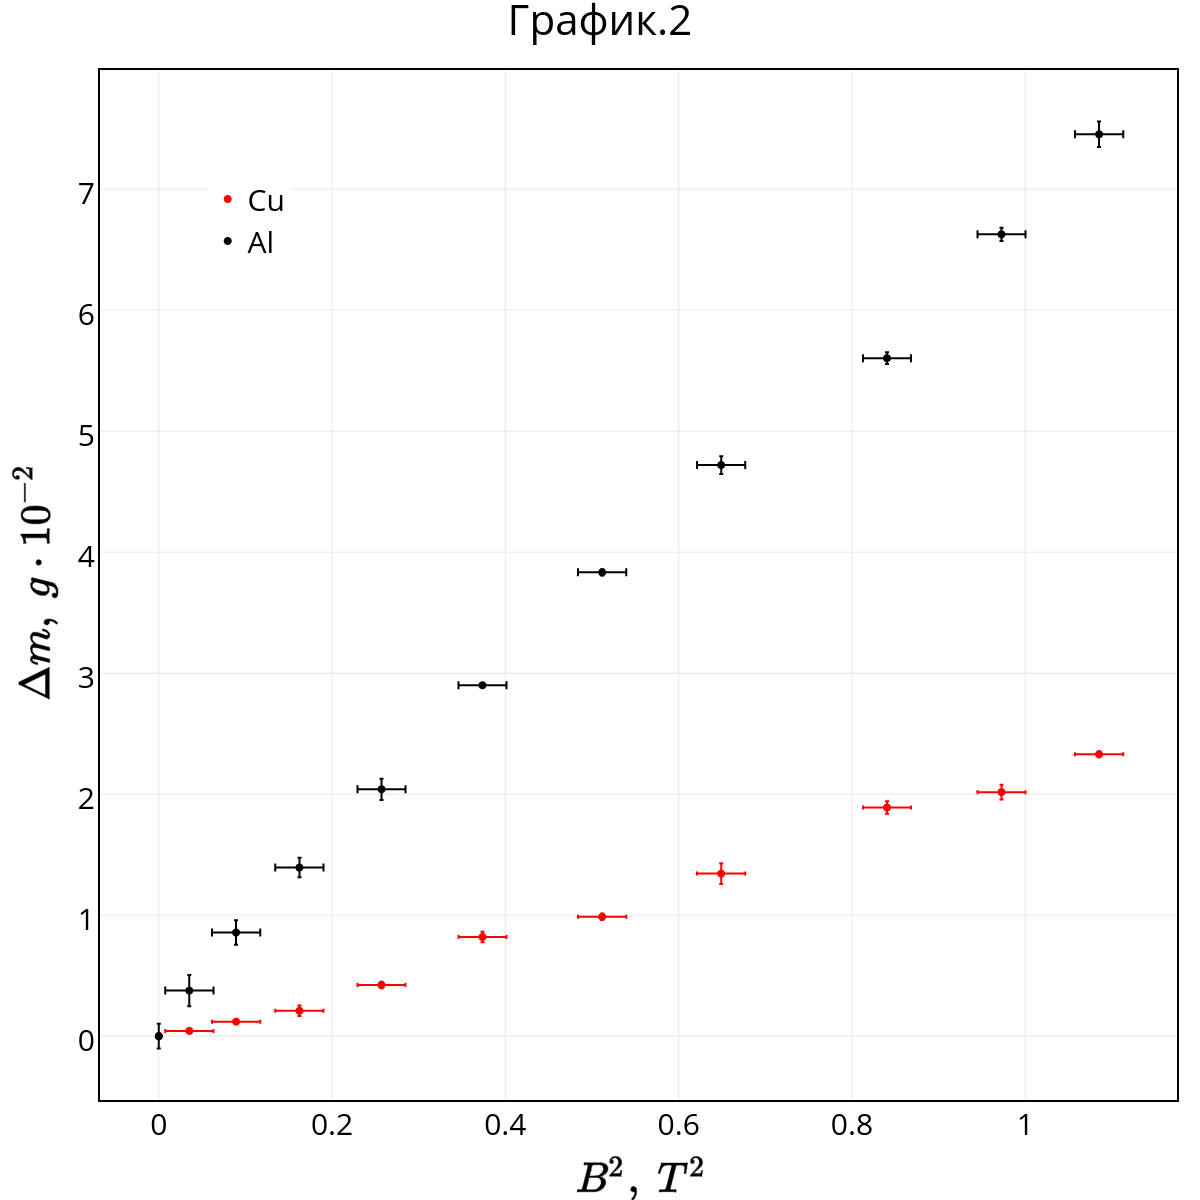

In [29]:
trace1 = go.Scatter(
    x = data['square_B'],
    y = np.fabs(data['mean_Cu'])*100,
    mode = 'markers',
    name = 'Cu',
    error_y = dict(
        type = 'data',
        array=data['sqr_Cu']*100,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array=data['square_B_err'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 8,
        opacity = 1,
        color = '#ff0000'
    )
)

trace2 = go.Scatter(
    x = data['square_B'],
    y = np.fabs(data['mean_Al']*100),
    mode = 'markers',
    name = 'Al',
    error_y = dict(
        type = 'data',
        array=data['sqr_Al']*100,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array=data['square_B_err'],
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 8,
        opacity = 1,
        color = '#000000'
    )
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "График.2",
    width = 1200,
    height = 1200,
    showlegend=True,
    legend=dict(
        x=0.1,
        y=0.9
        #orientation= "h"
    ),
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B^2,~T^2$',
        #range = [0, 70],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\Delta {m},~g \cdot 10^{-2} $',
        #range = [0, 7],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

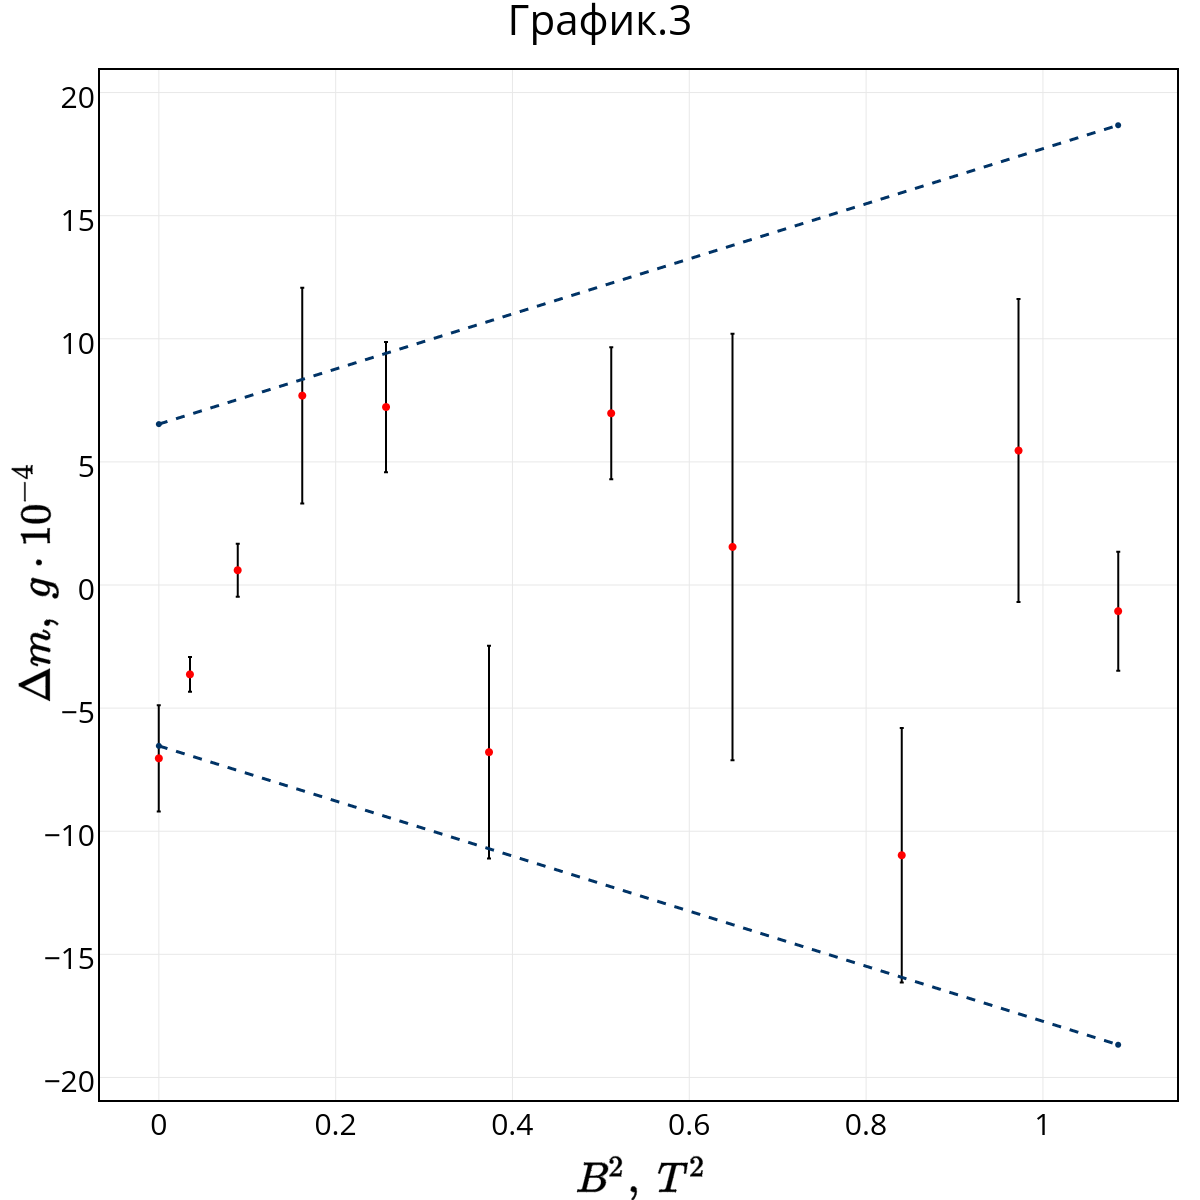

In [30]:
trace1 = go.Scatter(
    x = data['square_B'],
    y = 10000*(data['mean_Cu'] + data['square_B']*0.0220241 - 0.0007039),
    mode = 'markers',
    name = 'gr1',
    error_y = dict(
        type = 'data',
        array = data['sqr_Cu']*10000,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 8,
        opacity = 1,
        color = '#ff0000'
    )
)

trace2 = go.Scatter(
    x = [(data['mean_B']**2).min(), (data['mean_B']**2).max()],
    y = [10000*((data['mean_B']**2).min()*0.0005593*2 + 0.0003267*2), 10000*((data['mean_B']**2).max()*0.0005593*2 + 0.0003267*2)],
    line = dict(
        color = ('#003366'),
        width = 3,
        dash = 'dash')
)

trace3 = go.Scatter(
    x = [(data['mean_B']**2).min(), (data['mean_B']**2).max()],
    y = [10000*(-(data['mean_B']**2).min()*0.0005593*2 - 0.0003267*2), 10000*(-(data['mean_B']**2).max()*0.0005593*2 - 0.0003267*2)],
    line = dict(
        color = ('#003366'),
        width = 3,
        dash = 'dash')
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "График.3",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B^2,~T^2$',
        #range = [0, 70],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\Delta {m},~g \cdot 10^{-4} $',
        #range = [0, 7],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

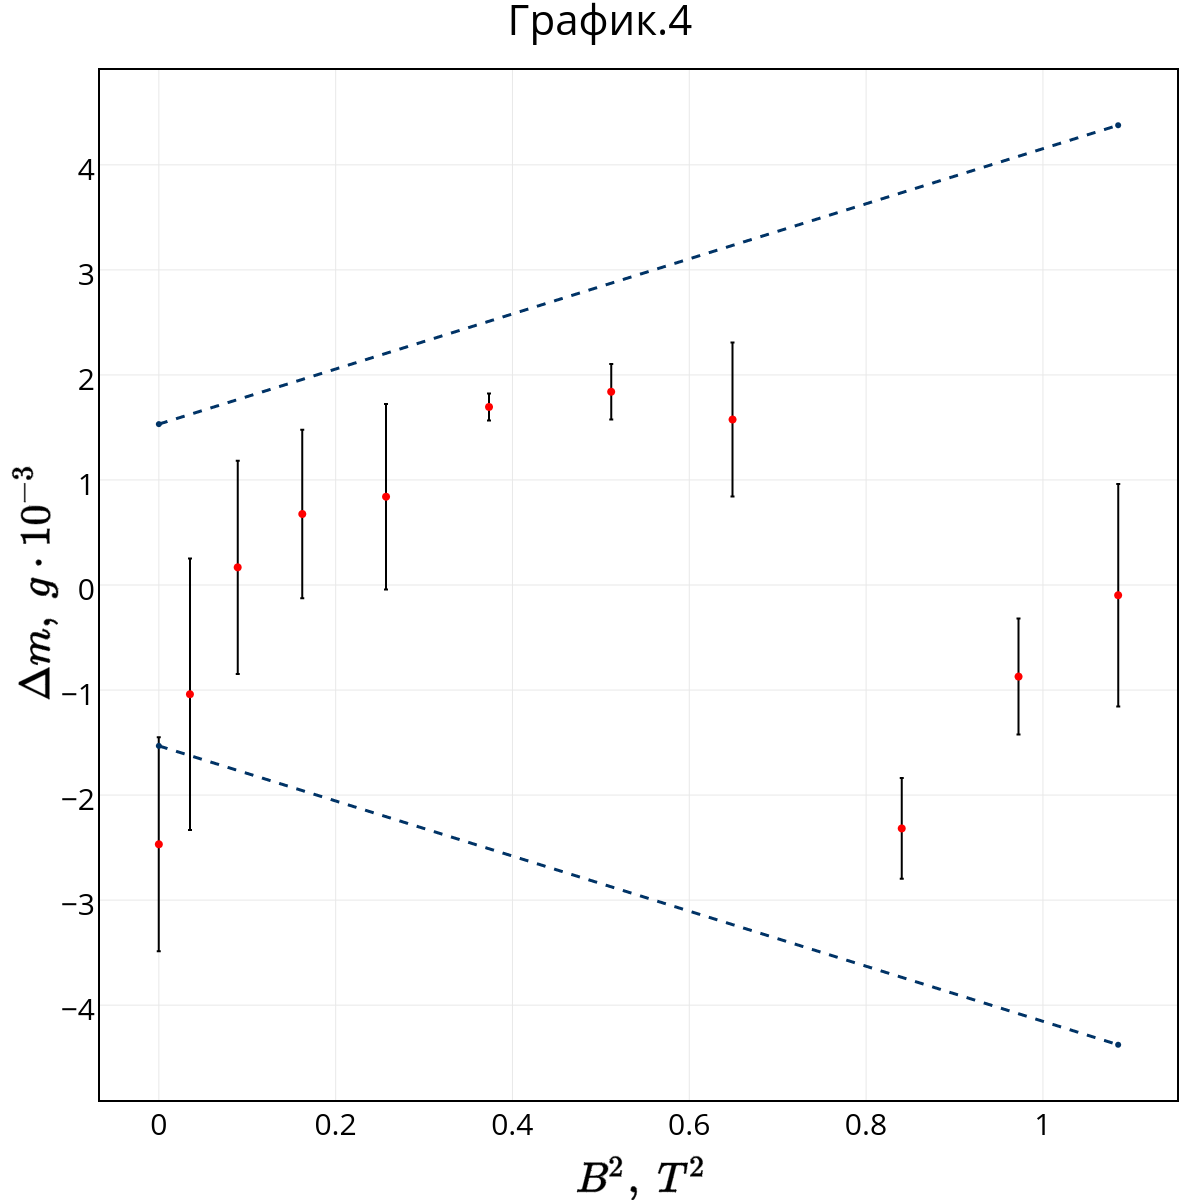

In [31]:
trace1 = go.Scatter(
    x = data['square_B'],
    y = 1000*(data['mean_Al'] - data['square_B']*0.0665047 - 0.0024684),
    mode = 'markers',
    name = 'gr1',
    error_y = dict(
        type = 'data',
        array = data['sqr_Al']*1000,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 8,
        opacity = 1,
        color = '#ff0000'
    )
)

trace2 = go.Scatter(
    x = [(data['mean_B']**2).min(), (data['mean_B']**2).max()],
    y = [1000*((data['mean_B']**2).min()*0.0013111*2 + 0.0007658*2), 1000*((data['mean_B']**2).max()*0.0013111*2 + 0.0007658*2)],
    line = dict(
        color = ('#003366'),
        width = 3,
        dash = 'dash')
)

trace3 = go.Scatter(
    x = [(data['mean_B']**2).min(), (data['mean_B']**2).max()],
    y = [1000*(-(data['mean_B']**2).min()*0.0013111*2 - 0.0007658*2), 1000*(-(data['mean_B']**2).max()*0.0013111*2 - 0.0007658*2)],
    line = dict(
        color = ('#003366'),
        width = 3,
        dash = 'dash')
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "График.4",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$B^2,~T^2$',
        #range = [0, 70],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\Delta {m},~g \cdot 10^{-3} $',
        #range = [0, 7],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot4.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot4.png", width=500)